In [1]:
%load_ext autoreload
import os,sys
import pandas as pd
import seaborn as sns
import numpy as np
import progressbar
import dill as pickle
from datetime import datetime
import matplotlib as mpl
import matplotlib.pyplot as plt
import logging

sys.path.append("../")

print(sys.path)

%autoreload 2
from src.pySRM.pysrm.regions import SpectraRegion, ProteinWeights
%autoreload 2
from src.pySRM.pysrm.imzml import IMZMLExtract
%autoreload 2
from src.pySRM.pysrm.comparative import CombinedSpectra

loggers = [logging.getLogger(name) for name in logging.root.manager.loggerDict]
for logger in loggers:
    logger.setLevel(logging.INFO)

['/mnt/f/dev/git/pyIMS/examples', '/usr/lib/python38.zip', '/usr/lib/python3.8', '/usr/lib/python3.8/lib-dynload', '', '/usr/local/lib/python3.8/dist-packages', '/usr/local/lib/python3.8/dist-packages/mpld3-0.3.1.dev1-py3.8.egg', '/usr/lib/python3/dist-packages', '/usr/local/lib/python3.8/dist-packages/IPython/extensions', '/home/mjoppich/.ipython', '../']


Load an imzML file

In [2]:
imze = IMZMLExtract("/mnt/d/dev/data/msi/slideD/181114_AT1_Slide_D_Proteins.imzML")

Opening regions file for /mnt/d/dev/data/msi/slideD/181114_AT1_Slide_D_Proteins.imzML


Explore which regions are there?

0 ((356, 400, 215, 273), 2655)
1 ((436, 478, 632, 687), 2408)
2 ((1572, 1612, 608, 666), 2419)
3 ((1149, 1197, 142, 205), 3136)
4 ((618, 666, 211, 266), 2744)
5 ((633, 684, 630, 688), 3068)
6 ((1357, 1400, 628, 686), 2596)


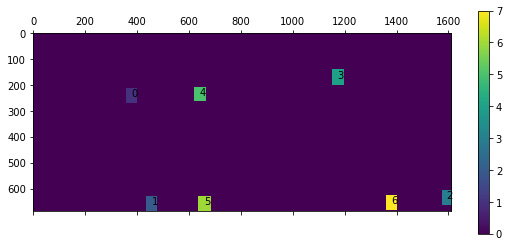

{0: ((356, 400, 215, 273), 2655),
 1: ((436, 478, 632, 687), 2408),
 2: ((1572, 1612, 608, 666), 2419),
 3: ((1149, 1197, 142, 205), 3136),
 4: ((618, 666, 211, 266), 2744),
 5: ((633, 684, 630, 688), 3068),
 6: ((1357, 1400, 628, 686), 2596)}

In [3]:
imze.list_regions()

Start with prozessing the first region , region 0

In [4]:
spectra0_orig = imze.get_region_array(0, makeNullLine=True)
spectra0_intra = imze.normalize_region_array(spectra0_orig, normalize="intra_median")
spectra0 = imze.normalize_region_array(spectra0_intra, normalize="inter_median")

Fetching region range
Fetching region shape
Found region 0 with shape (45, 59, 17900)
Fetching region spectra
100% (2655 of 2655) |####################| Elapsed Time: 0:00:03 Time:  0:00:03
100% (2655 of 2655) |####################| Elapsed Time: 0:00:00 Time:  0:00:00
Started Log Value: 0.14000733569264412
100% (45 of 45) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
Got 2655 median-enabled pixels
5-Number stats for medians: (2655, 2655, 0.2905536462232088, 0.5712127712945096, 0.6654297160132764, 0.7571640240536153, 1.119313296797138)
Started Log Value: 0.21725614592432976
100% (45 of 45) |########################| Elapsed Time: 0:00:15 Time:  0:00:15
Got a total of 47524500 fold changes
Median elements [23762250]
Median elements
Global Median 0.64579


In [5]:
spectra1_orig = imze.get_region_array(1, makeNullLine=True)
spectra1_intra = imze.normalize_region_array(spectra1_orig, normalize="intra_median")
spectra1 = imze.normalize_region_array(spectra1_intra, normalize="inter_median")

Found region 1 with shape (43, 56, 17900)
Started Log Value: 0.17063884288072587
Got 2408 median-enabled pixels
5-Number stats for medians: (2408, 2408, 0.3039763115205163, 0.5889737648019792, 0.6580512343895084, 0.7246390240951075, 1.0161616910876121)
Started Log Value: 0.2648863598704338
Got a total of 43103200 fold changes
Median elements [21551600]
Median elements
Global Median 0.64556


Started Log Value: 0.14000733569264412


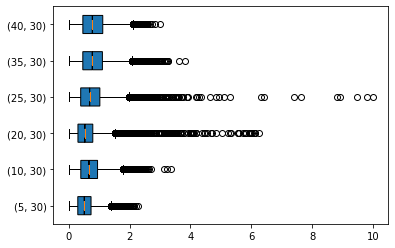

In [6]:
imze.plot_fcs(spectra0_orig, [(5,30),(10,30),(20,30),(25,30),(35,30),(40,30)])

Started Log Value: 0.21725614592432976


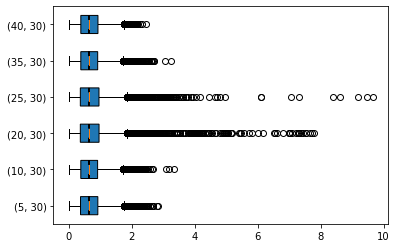

In [7]:
imze.plot_fcs(spectra0_intra, [(5,30),(10,30),(20,30),(25,30),(35,30),(40,30)])

Started Log Value: 0.3364191856862599


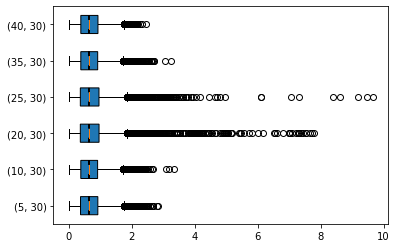

In [8]:
imze.plot_fcs(spectra0, [(5,30),(10,30),(20,30),(25,30),(35,30),(40,30)])

Started Log Value: 0.17063884288072587


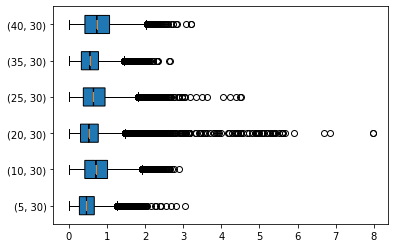

In [9]:
imze.plot_fcs(spectra1_orig, [(5,30),(10,30),(20,30),(25,30),(35,30),(40,30)])

Started Log Value: 0.2648863598704338


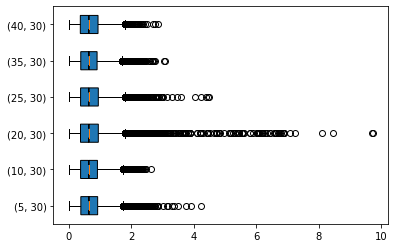

In [10]:
imze.plot_fcs(spectra1_intra, [(5,30),(10,30),(20,30),(25,30),(35,30),(40,30)])

Started Log Value: 0.4103202798662151


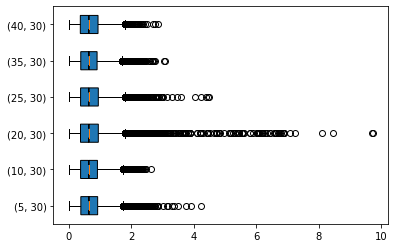

In [11]:
imze.plot_fcs(spectra1, [(5,30),(10,30),(20,30),(25,30),(35,30),(40,30)])

We can now ensure that the normalized spectra are indeed comparable.

Where are the highest peaks? This may give a hint on whether or not a normalization by max intensity would also have worked. => here: most probably yes!

3454.87441091502 39
3456.383544128344 278
3457.8926773416683 2332
4965.516757452595 2
14980.124761072322 2
14981.633894285647 2


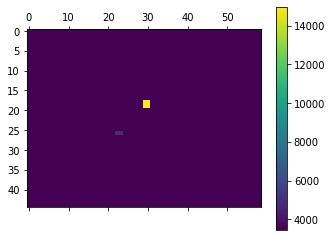

2655 45.060471276429595 282.8224196423905 133.18045036950951


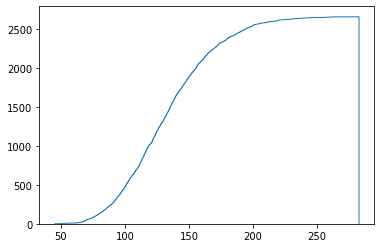

In [14]:
imze.list_highest_peaks(spectra0, counter=True)

Let's plot the norm of each spectrum

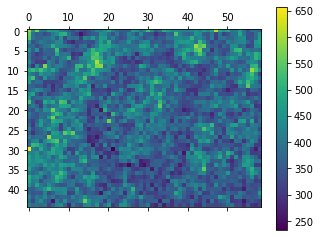

In [13]:
imze.plot_tnc(spectra0)

It can be seen that the norm of the spectra differs. However, given that intensities should be comparable, and that there was sample everywhere => just continue

In [6]:
spec = SpectraRegion(spectra0, imze.mzValues)

In [16]:
spec.calculate_similarity(mode="spectra_log")

2020-09-27 19:09:54,862  SpectraRegion  INFO: dimensions inputarray: 17900
2020-09-27 19:09:54,863  SpectraRegion  INFO: Creating C++ obj
2020-09-27 19:09:54,863  SpectraRegion  INFO: 17900 (45, 59, 17900)
2020-09-27 19:09:54,863  SpectraRegion  INFO: dimensions 17900
2020-09-27 19:09:54,864  SpectraRegion  INFO: input dimensions (45, 59, 17900)
2020-09-27 19:09:54,864  SpectraRegion  INFO: Switching to dot mode
2020-09-27 19:09:54,935  SpectraRegion  INFO: Starting calc similarity c++
2020-09-27 19:10:43,065  SpectraRegion  INFO: outclust dimensions (2655, 2655)
2020-09-27 19:10:43,067  SpectraRegion  INFO: Calculating spectra similarity
2020-09-27 19:10:43,094  SpectraRegion  INFO: Calculating spectra similarity done


array([[1.        , 0.97618073, 0.9691782 , ..., 0.83840245, 0.8406169 ,
        0.85142994],
       [0.97618073, 1.        , 0.98342717, ..., 0.88986284, 0.8919327 ,
        0.90145195],
       [0.9691782 , 0.98342717, 1.        , ..., 0.90628433, 0.9039524 ,
        0.91665334],
       ...,
       [0.83840245, 0.88986284, 0.90628433, ..., 1.        , 0.9589327 ,
        0.96420807],
       [0.8406169 , 0.8919327 , 0.9039524 , ..., 0.9589327 , 1.        ,
        0.9649949 ],
       [0.85142994, 0.90145195, 0.91665334, ..., 0.96420807, 0.9649949 ,
        1.        ]], dtype=float32)

There are various (unsupervised) clustering techniques. Like UMAP+HDBSCAN

In [54]:
spec.segment(method="UMAP_DBSCAN", number_of_regions=15, min_cluster_size=9, num_samples=1000)

2020-09-28 14:29:35,817  SpectraRegion  INFO: Calculating clusters
2020-09-28 14:29:35,818  SpectraRegion  INFO: Elem Matrix of shape: (2655, 17900)
2020-09-28 14:29:35,877  SpectraRegion  INFO: UMAP reduction
2020-09-28 14:29:57,851  SpectraRegion  INFO: HDBSCAN reduction
2020-09-28 14:29:57,852  SpectraRegion  INFO: HDBSCAN Clusterer with matrix (1000, 2)
2020-09-28 14:29:57,875  SpectraRegion  INFO: HDBSCAN Soft Clusters with matrix (2655, 2)
2020-09-28 14:29:58,107  SpectraRegion  INFO: HDBSCAN Soft Clusters as output matrix (2655, 3)
2020-09-28 14:29:58,108  SpectraRegion  INFO: HDBSCAN Soft Clusters: (2655, 3)
2020-09-28 14:29:58,109  SpectraRegion  INFO: HDBSCAN Labeling
2020-09-28 14:29:58,129  SpectraRegion  INFO: Calculating clusters done
2020-09-28 14:29:58,139  SpectraRegion  INFO: Calculating clusters saved


[[0.00231115 0.74211153 0.01515548]
 [0.13298138 0.         0.86701861]
 [0.00528582 0.32336961 0.20618278]
 ...
 [0.8107632  0.00486088 0.00575942]
 [0.83392995 0.03978376 0.04681656]
 [0.9304544  0.00147462 0.0017649 ]]


array([[2, 3, 2, ..., 1, 1, 1],
       [2, 2, 3, ..., 1, 1, 1],
       [2, 2, 3, ..., 1, 1, 1],
       ...,
       [3, 3, 2, ..., 1, 1, 1],
       [3, 3, 2, ..., 1, 1, 1],
       [3, 2, 2, ..., 1, 1, 1]], dtype=int16)

In [51]:
spec.redo_hdbscan_on_dimred(number_of_regions=15, min_cluster_size=9, num_samples=500)

2020-09-28 14:29:12,842  SpectraRegion  INFO: HDBSCAN reduction
2020-09-28 14:29:12,843  SpectraRegion  INFO: HDBSCAN Clusterer with matrix (500, 2)
2020-09-28 14:29:12,854  SpectraRegion  INFO: HDBSCAN Soft Clusters with matrix (2655, 2)
2020-09-28 14:29:13,083  SpectraRegion  INFO: HDBSCAN Soft Clusters as output matrix (2655, 6)
2020-09-28 14:29:13,083  SpectraRegion  INFO: HDBSCAN Soft Clusters: (2655, 6)
2020-09-28 14:29:13,084  SpectraRegion  INFO: HDBSCAN Labeling


[[9.93708107e-02 6.00992275e-02 7.19315090e-02 3.66654559e-02
  3.54532538e-02 3.95154231e-02]
 [1.01771791e-01 5.87681965e-02 7.04882467e-02 3.63158133e-02
  3.50978101e-02 3.91653975e-02]
 [1.04340479e-01 6.68219280e-02 8.09395975e-02 3.98012243e-02
  3.84993954e-02 4.28887358e-02]
 ...
 [5.85279025e-11 6.66642897e-02 1.98112972e-01 6.80499288e-02
  6.20528393e-02 7.92220560e-02]
 [7.55670486e-02 7.68514310e-02 5.05729409e-01 7.37470640e-02
  6.69411791e-02 8.60834065e-02]
 [2.41762435e-02 1.05345941e-01 1.98900807e-01 5.62208923e-02
  5.15276184e-02 6.55359021e-02]]


In [41]:
len(spec.dimred_labels)

2655

2020-09-28 14:29:14,875  SpectraRegion  INFO: Pixels    : 2655
2020-09-28 14:29:14,876  SpectraRegion  INFO: Unassigned: 0


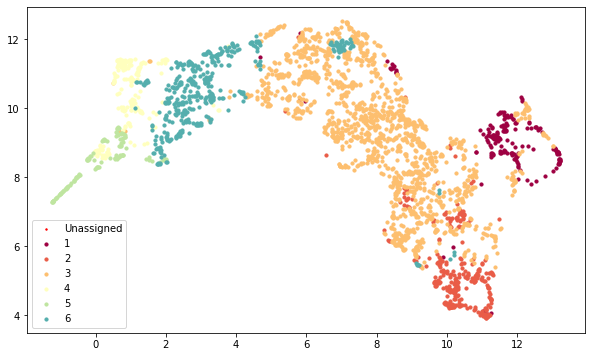

In [52]:
mpl.rcParams['figure.figsize'] = (10,6)
spec.vis_umap(legend=True)
mpl.rcParams['figure.figsize'] = (6,4)

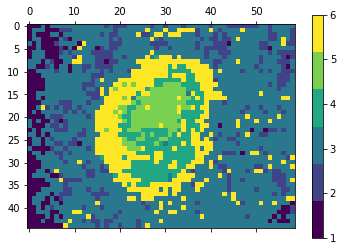

In [53]:
spec.plot_segments()

In [20]:
spec.filter_clusters(method='remove_singleton')
spec.filter_clusters(method='merge_background')
spec.filter_clusters(method='remove_islands')

2020-09-27 19:11:09,059  SpectraRegion  INFO: Assigning clusters to background: {8, 10, 11, 12, 13, 14, 15}


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int16)

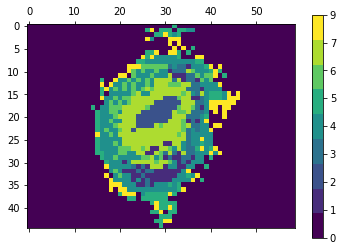

In [21]:
spec.plot_segments()

Which may or may not work well - more robustly, and maybe faster is a classic clustering of the similarity scores:

In [22]:
spec.segment(method="WARD", number_of_regions=15)

2020-09-27 19:11:09,194  SpectraRegion  INFO: Calculating clusters
2020-09-27 19:11:09,335  SpectraRegion  INFO: Calculating clusters done
2020-09-27 19:11:09,356  SpectraRegion  INFO: Calculating clusters saved


array([[6, 6, 6, ..., 2, 2, 4],
       [6, 6, 7, ..., 2, 4, 4],
       [6, 6, 7, ..., 1, 4, 4],
       ...,
       [6, 6, 6, ..., 4, 4, 4],
       [6, 6, 6, ..., 4, 4, 4],
       [6, 6, 7, ..., 4, 4, 4]], dtype=int16)

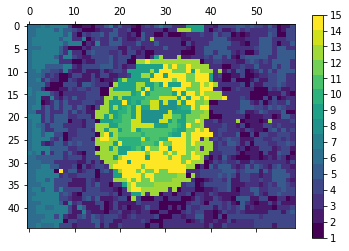

In [23]:
spec.plot_segments()

In [24]:
spec.filter_clusters(method='remove_singleton')
spec.filter_clusters(method='merge_background')
spec.filter_clusters(method='remove_islands')

2020-09-27 19:11:09,501  SpectraRegion  INFO: Assigning clusters to background: {1, 2, 3, 4, 5, 6, 7}


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int16)

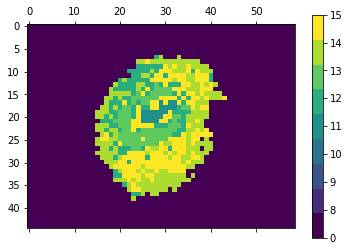

In [25]:
spec.plot_segments()

A manual curation of the segmentation is still possible!

In [26]:
spec.segmented[0:6,] = 0

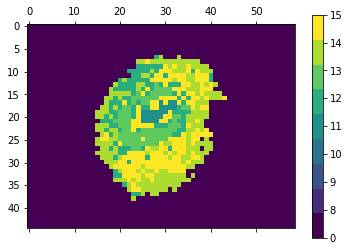

In [27]:
spec.plot_segments()

Consensus Analysis

In [28]:
spec.consensus_spectra()

2020-09-27 19:11:09,773  SpectraRegion  INFO: Calculating consensus spectra
2020-09-27 19:11:09,804  SpectraRegion  INFO: Calculating consensus spectra done


{0: array([0.67580456, 0.67580456, 0.67580456, ..., 0.28381686, 0.28381686,
        0.28381686]),
 9: array([0.65775871, 0.65775871, 0.65775871, ..., 0.3040875 , 0.3040875 ,
        0.3040875 ]),
 13: array([0.57613317, 0.57613317, 0.57613317, ..., 0.32186837, 0.32186837,
        0.32186837]),
 15: array([0.59695091, 0.59695091, 0.59695091, ..., 0.31012577, 0.31012577,
        0.31012577]),
 12: array([0.75340538, 0.75340538, 0.75340538, ..., 0.28799026, 0.28799026,
        0.28799026]),
 11: array([1.03077652, 1.03077652, 1.03077652, ..., 0.27485947, 0.27485947,
        0.27485947]),
 10: array([0.64412435, 0.64412435, 0.64412435, ..., 0.26182433, 0.26182433,
        0.26182433]),
 14: array([0.79604846, 0.79604846, 0.79604846, ..., 0.22558753, 0.22558753,
        0.22558753]),
 8: array([0.92792216, 0.92792216, 0.92792216, ..., 0.25138255, 0.25138255,
        0.25138255])}

In [29]:
spec.consensus_similarity()

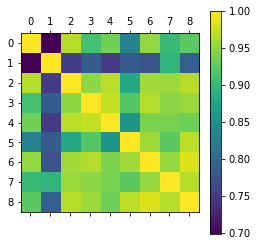

In [30]:
spec.plot_consensus_similarity()

2020-09-27 19:11:10,013  SpectraRegion  INFO: Found clusterLabels [0, 8, 9, 10, 11, 12, 13, 14, 15]
2020-09-27 19:11:10,014  SpectraRegion  INFO: Processing clusterLabel 0
2020-09-27 19:12:15,702  SpectraRegion  INFO: Processing clusterLabel 8
2020-09-27 19:12:15,725  SpectraRegion  INFO: Processing clusterLabel 9
2020-09-27 19:12:15,890  SpectraRegion  INFO: Processing clusterLabel 10
2020-09-27 19:12:15,913  SpectraRegion  INFO: Processing clusterLabel 11
2020-09-27 19:12:15,956  SpectraRegion  INFO: Processing clusterLabel 12
2020-09-27 19:12:16,024  SpectraRegion  INFO: Processing clusterLabel 13
2020-09-27 19:12:16,253  SpectraRegion  INFO: Processing clusterLabel 14
2020-09-27 19:12:16,263  SpectraRegion  INFO: Processing clusterLabel 15


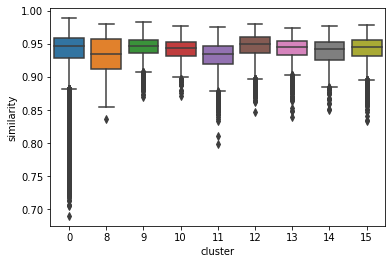

In [31]:
spec.plot_consensus_similarity(mode="spectra")

All clusters hare a 95% similarity in median. Cluster 0 (background) is the most heterogeneous one.

In [32]:
#spec.plot_inter_consensus_similarity()

# Differential Analysis

One of the stand-alone features of pyIMS is the integration with differential expression analysis. Here several key-features are presented.

First, single masses are looked at:

2020-09-27 19:12:17,606  SpectraRegion  INFO: Processing Mass 14954 with best existing mass 14954.46949644581


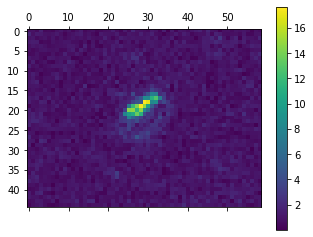

array([[0.82385149, 0.86264522, 0.49721109, ..., 0.24492729, 0.86041828,
        0.65921243],
       [1.87043287, 0.78807366, 1.3411693 , ..., 0.4120491 , 0.9107944 ,
        1.00745731],
       [0.95879405, 1.16647921, 0.54069431, ..., 0.90882606, 0.74983204,
        1.82300519],
       ...,
       [1.20795686, 0.93115886, 0.90644756, ..., 0.73014098, 1.17134226,
        1.13743474],
       [0.62210889, 0.69715361, 1.27652689, ..., 1.65667113, 0.7134432 ,
        1.15874405],
       [0.26637443, 0.77544398, 1.02433959, ..., 0.29809782, 0.75653545,
        1.09764161]])

In [33]:
spec.mass_heatmap(14954, min_cut_off=0.0025)

The mass with m/z-value 14954 apparently is most active within the aorta structure (center of the image). Is this specific to a specific cluster

2020-09-27 19:12:17,736  SpectraRegion  INFO: Processing Mass 14954 with best existing mass 14954.46949644581


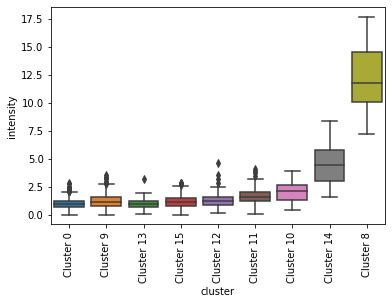

/usr/local/lib/python3.8/dist-packages/IPython/core/pylabtools.py:132: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


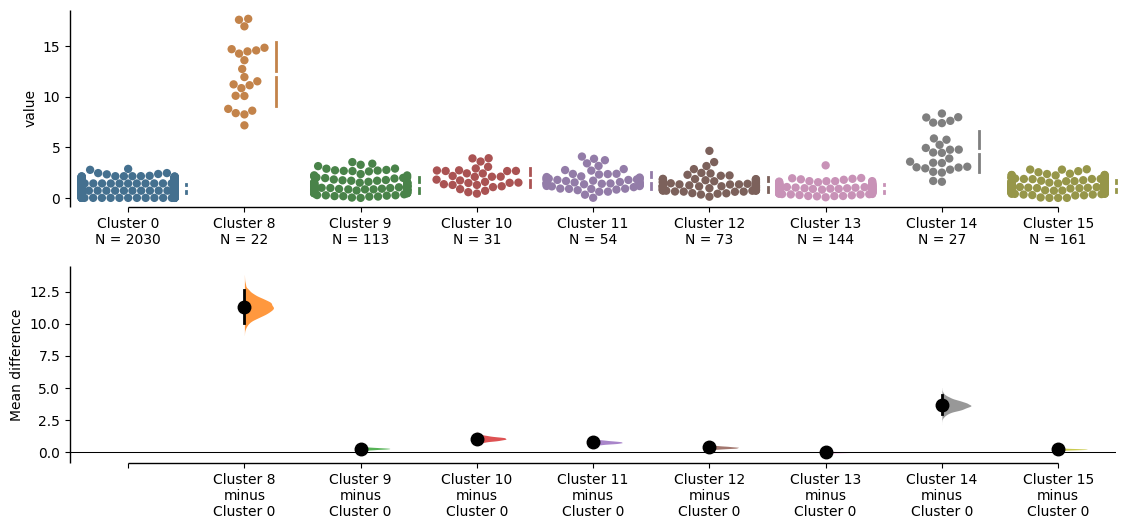

In [34]:
dfobj = spec.mass_dabest(14954)

The DABEST-Plot also clearly reveals that in contrast to the background, cluster 8 intensity values for this mass are quite higher than for all other clusters.

Abviously this mass is most intense in Cluster 8, but also cluster 14. We can now take a look at this mass by setting cluster 14 as reference cluster

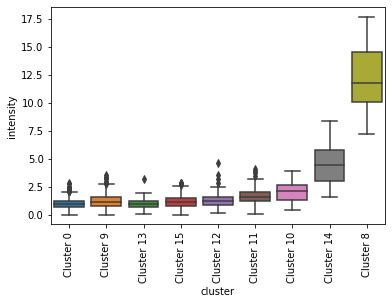

/usr/local/lib/python3.8/dist-packages/IPython/core/pylabtools.py:132: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


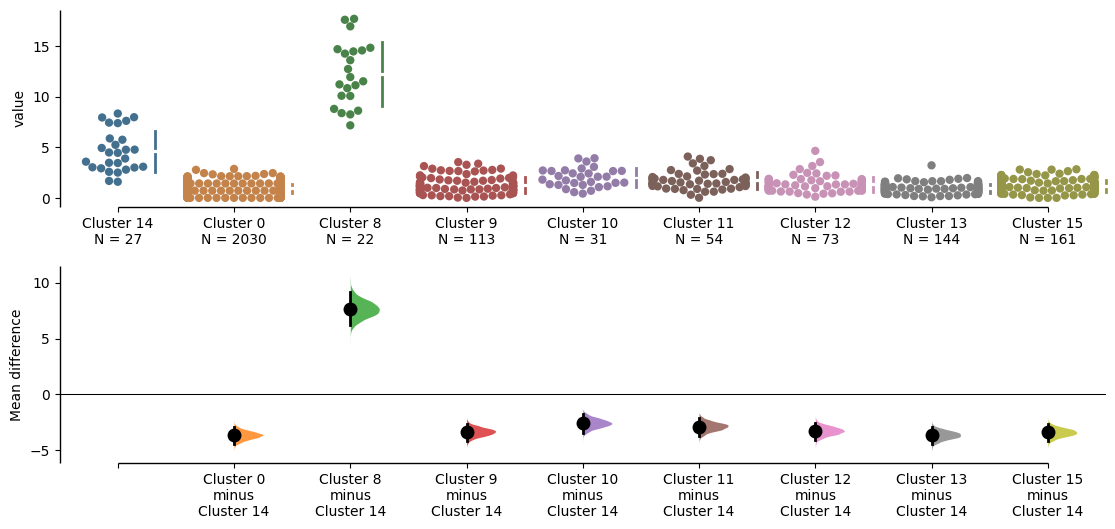

In [35]:
spec.mass_dabest(14954, background=14)

Not knowing where this cluster 8 is, we can highlight it specifically:

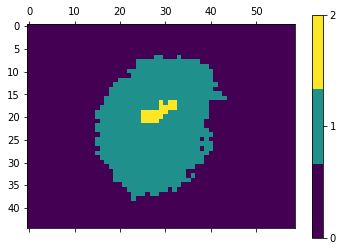

In [36]:
spec.plot_segments(highlight=8)

Or together with cluster 14, where this mass is also prevalent.

On a sidenote: background is set to 0, other regions == 1, and the target region is set to 2

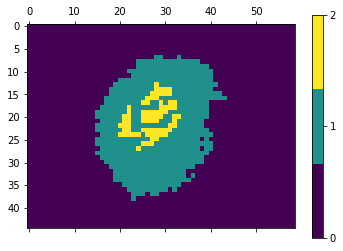

In [37]:
spec.plot_segments(highlight=[8,11])

Just for the sake of clarity: we now remove all differential expression results!

In [38]:
spec.clear_de_results()

## Protein m/z to name

For any combination of sequencing results with these IMS analyses, knowing which protein was measured is of interest.

Using a previously performed LC-MS/MS experiment, which delivers detected proteins together with the masses, allows an easy translation of m/z values to protein name.
This work is done in the ProteinWeights object.

In [39]:
pw = ProteinWeights("protein_weights.tsv")

With the m/z->protein object we can now find all marker masses for the 15 detected regions

For example we can also try to find out, which protein corresponds to mass 14954 ! (it's Ifitm3 ...)

In [40]:
pw.get_protein_from_mass(14954)

[('Ifitm3', 14954.0)]

Marker masses/proteins/genes are genes which are differentially regulated when compared to the specific cluster and all other clusters (including or excluding the background cluster).

Making the distinction regarding the background cluster might be required if the target tissue is embedded in another tissue. Excluding the background might then deliver more sensitive results.

In [41]:
mgenes = spec.find_all_markers(pw, includeBackground=False,
                               replaceExisting=False,
                               outdirectory="./deresults/",
                               use_methods=["ttest", "rank"])

/usr/local/lib/python3.8/dist-packages/anndata/_core/anndata.py:119: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


In [42]:
mgenes["ttest"]

,clusterID,gene_ident,gene_mass,gene,protein_mass,avg_logFC,qvalue,num,anum,mean,median,num_bg,anum_bg,mean_bg,median_bg
0,9,mass_14921_268565752678,14921.268566,Mrps14,14920.0,-0.509849,0.000152,113,107,0.620672,0.575942,512,502,0.883775,0.676926
1,9,mass_14922_777698966001,14922.777699,Mrps14,14920.0,-0.502858,0.000128,113,110,0.649218,0.607433,512,505,0.919954,0.700307
2,9,mass_14951_451230019162,14951.451230,Ifitm3,14954.0,-0.578191,0.000027,113,112,1.147351,0.982435,512,510,1.712968,1.118923
3,9,mass_14952_960363232487,14952.960363,Ifitm3,14954.0,-0.591802,0.000022,113,112,1.182339,1.007231,512,510,1.781937,1.146525
4,9,mass_14954_46949644581,14954.469496,Pfn1,14957.0,-0.617750,0.000017,113,112,1.242006,1.097036,512,509,1.905835,1.199646
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
479,8,mass_29923_561839409052,29923.561839,Cerk,29922.0,1.031802,0.000024,22,22,0.697700,0.669247,603,576,0.341244,0.336632
480,8,mass_29946_198837608918,29946.198838,Exosc8,29949.0,0.821618,0.001020,22,22,0.568648,0.520686,603,567,0.321745,0.313734
481,8,mass_29947_70797082224,29947.707971,Exosc8,29949.0,0.759363,0.004251,22,22,0.532271,0.524174,603,564,0.314443,0.302384
482,8,mass_29949_217104035568,29949.217104,Exosc8,29949.0,0.692339,0.012194,22,22,0.512144,0.526945,603,568,0.316940,0.297317


In [43]:
mgenes_bg = spec.find_all_markers(pw, includeBackground=True, replaceExisting=False, use_methods = ["ttest", "rank"])

After both find_all_markers runs we can list all DE results, which are then printed.
Each row shows one contained DE results beginning with the test performed and then a tuple of two region/cluster IDs. In the first row here:

a t-test was performed on cluster 9 versus clusters 8,10,11,12,13,14,15 .

In [44]:
spec.list_de_results()

[('ttest', ((9,), (8, 10, 11, 12, 13, 14, 15))),
 ('ttest', ((13,), (8, 9, 10, 11, 12, 14, 15))),
 ('ttest', ((15,), (8, 9, 10, 11, 12, 13, 14))),
 ('ttest', ((12,), (8, 9, 10, 11, 13, 14, 15))),
 ('ttest', ((11,), (8, 9, 10, 12, 13, 14, 15))),
 ('ttest', ((10,), (8, 9, 11, 12, 13, 14, 15))),
 ('ttest', ((14,), (8, 9, 10, 11, 12, 13, 15))),
 ('ttest', ((8,), (9, 10, 11, 12, 13, 14, 15))),
 ('ttest', ((0,), (8, 9, 10, 11, 12, 13, 14, 15))),
 ('ttest', ((9,), (0, 8, 10, 11, 12, 13, 14, 15))),
 ('ttest', ((13,), (0, 8, 9, 10, 11, 12, 14, 15))),
 ('ttest', ((15,), (0, 8, 9, 10, 11, 12, 13, 14))),
 ('ttest', ((12,), (0, 8, 9, 10, 11, 13, 14, 15))),
 ('ttest', ((11,), (0, 8, 9, 10, 12, 13, 14, 15))),
 ('ttest', ((10,), (0, 8, 9, 11, 12, 13, 14, 15))),
 ('ttest', ((14,), (0, 8, 9, 10, 11, 12, 13, 15))),
 ('ttest', ((8,), (0, 9, 10, 11, 12, 13, 14, 15))),
 ('rank', ((9,), (8, 10, 11, 12, 13, 14, 15))),
 ('rank', ((13,), (8, 9, 10, 11, 12, 14, 15))),
 ('rank', ((15,), (8, 9, 10, 11, 12, 13, 14)

It's also easy to save the result to disk:

In [45]:
markerGenes = mgenes["ttest"]
markerGenes.to_csv("deresults/marker_genes.tsv", sep="\t", index=False)

In [46]:
markerGenesBG = mgenes_bg["ttest"]
markerGenesBG.to_csv("deresults/marker_genes_bg.tsv", sep="\t", index=False)

In [47]:
print("Number of unique, differentially detected proteins (from masses): {}".format(len(set(mgenes["ttest"]["gene"]))))

Number of unique, differentially detected proteins (from masses): 230


In [48]:
print("Number of unique, differentially detected proteins (from masses): {}".format(len(set(mgenes_bg["ttest"]["gene"]))))

Number of unique, differentially detected proteins (from masses): 382


In order to save the results, the SpectraRegion object can be pickled:

In [49]:
with open("slideD_region_0.spec.pickle", "wb") as fout:
    pickle.dump(spec, fout)

# Cell-type detection

Cell-type detection requires analyseMarkers.py from https://github.com/mjoppich/scrnaseq_celltype_prediction .

One (obvious) question is: what can I do with those marker proteins? Well, a lot!

First, these are the proteins which you are interested in: these define your clusters, because they are present.

Second, these proteins give a clue about which cell types might be present, if cell-type specific genes were found.

Using the scrnaseq-celltype-prediction tool, this can be analysed! Let's download it first (requires wget, python3 and several other libraries - maybe).
Did you know? This tool achieves better predictions than SingleR :)

Because we know what kind of sample we got (aorta embedded in liver), we can specify organs to specifically check for cell types.
Organs to be considered are "Connective tissue" "Vasculature" "Heart" "Skeletal Muscle" "Smooth muscle" "Immune system" "Blood" "Epithelium" "Liver".
This allows a context-specific evaluation!

In [50]:
! wget https://raw.githubusercontent.com/mjoppich/scrnaseq_celltype_prediction/master/analyseMarkers.py

--2020-09-27 19:20:42--  https://raw.githubusercontent.com/mjoppich/scrnaseq_celltype_prediction/master/analyseMarkers.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.12.133
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.12.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 19718 (19K) [text/plain]
Saving to: ‘analyseMarkers.py.1’

analyseMarkers.py.1 100%[===================>]  19.26K  --.-KB/s    in 0.03s   

2020-09-27 19:20:42 (704 KB/s) - ‘analyseMarkers.py.1’ saved [19718/19718]



In [51]:
! python3 analyseMarkers.py --organs "Connective tissue" "Vasculature" "Heart" "Skeletal Muscle" "Smooth muscle" "Immune system" "Blood" "Epithelium" "Liver" --pvaladj qvalue --markers deresults/marker_genes.tsv -n 2

Taking value gene from gene
Taking value cluster from clusterID
Taking value logfc from avg_logFC
Taking value pvaladj from qvalue
Taking value expr-mean from mean
Taking value expressing-cell-count from num
Taking value cluster-cell-count from anum
Got 8 clusters.
Starting analysis
Loaded Databases
known genes 41
known (celltype, organ) 57
8	Monocytes;Immune system	3.919451391214282	1	2	1	1	{'IFITM3'}	{'IFITM3'}
8	Gamma delta T cells;Immune system	1.3745893243900065	1	2	1	1	{'H2AFX'}	{'H2AFX'}
9	Monocytes;Immune system	0.0	1	2	1	1	{'IFITM3'}	{'IFITM3'}
10	Chondrocytes;Connective tissue	0.0	1	1	0	0	set()	{'MIF'}
10	Dendritic cells;Immune system	0.0	1	1	0	0	set()	{'MIF'}
11	Basophils;Immune system	0.0	1	1	0	0	set()	{'IFITM1'}
11	Cardiomyocytes;Heart	0.0	1	2	0	1	set()	{'HAMP'}
12	Hepatocytes;Liver	5.67040959303626	2	5	1	2	{'APOA2'}	{'TTR', 'APOA2'}
12	Adipocytes;Connective tissue	0.25198926968105145	1	3	1	2	{'APOC1'}	{'APOC1'}
13	Hepatic stellate cells;Liver	0.1335441840259661	1	1	0	0	se

This is quite interesting. For cluster 8 this tool predicts mainly monocytes or gamma delta t cells - cells which do not migrate into other tissues.

This makes sense, because one would expect these cell-types in the inner of the vessel.

H2AFX is known to be upregulated in lymphoblasts (check wikipedia ;) ).
Ifitm3 is highly expressed in both, Liver and Monocytes: https://www.proteinatlas.org/ENSG00000142089-IFITM3/tissue (Consensus dataset)

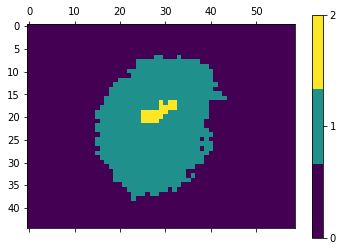

In [52]:
spec.plot_segments(highlight=(8))

In [53]:
! python3 analyseMarkers.py --organs "Connective tissue" "Vasculature" "Heart" "Skeletal Muscle" "Smooth muscle" "Immune system" "Blood" "Epithelium" "Liver" --pvaladj qvalue --markers deresults/marker_genes_bg.tsv -n 2

Taking value gene from gene
Taking value cluster from clusterID
Taking value logfc from avg_logFC
Taking value pvaladj from qvalue
Taking value expr-mean from mean
Taking value expressing-cell-count from num
Taking value cluster-cell-count from anum
Got 9 clusters.
Starting analysis
Loaded Databases
known genes 64
known (celltype, organ) 67
0	Hepatocytes;Liver	0.13486368599343374	2	6	1	2	{'APOA2'}	{'HAMP', 'APOA2'}
0	Hepatic stellate cells;Liver	0.11900939193698404	2	3	0	0	set()	{'TAGLN', 'RBP1'}
8	Hepatocytes;Liver	7.4294253179313365	4	6	1	2	{'APOA2'}	{'TTR', 'SAT2', 'HAMP', 'APOA2'}
8	Gamma delta T cells;Immune system	1.3745893243900065	1	2	1	1	{'H2AFX'}	{'H2AFX'}
9	Cardiomyocytes;Heart	0.0	1	2	0	1	set()	{'HAMP'}
9	Hepatic stellate cells;Liver	0.0	1	3	0	0	set()	{'RBP1'}
10	Monocytes;Immune system	1.4806431667077773	3	4	3	3	{'IFITM3', 'RHOC', 'MGMT'}	{'IFITM3', 'RHOC', 'MGMT'}
10	Mast cells;Immune system	1.2704148622346776	2	2	1	1	{'SOCS2'}	{'PCP4L1', 'SOCS2'}
11	Monocytes;Immune syst

In this analysis, the background was kept in. More differential genes are found, but also more liver-related cell types are found.

This suggests that the analysis which includes the liver background has influenced the found differential proteins too much.

Nonetheless, the results remain consistent. For cluster 8, the missing monocytes are replaced by hepatocytes, which are monocyte-like cells residing in the liver.

Cluster 9 showing high amounds of cardiomyocytes is also not unlikely, given its location at the outer area of the aorta.

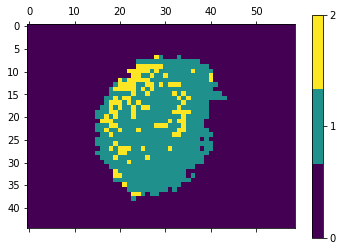

In [54]:
spec.plot_segments(highlight=(9))

Finally the SpectraRegion can also be exported to Aorta3D.

In [55]:
#spec.to_aorta3d("./slided_test/", "slided", 0, protWeights=pw, nodf=False, pathPrefix="../data/test_msi/")

In [56]:
!ls slided_test

slided.0.0.tsv	 slided.0.12.tsv  slided.0.15.tsv  slided.0.info
slided.0.10.tsv  slided.0.13.tsv  slided.0.8.tsv   slided.0.upgma.png
slided.0.11.tsv  slided.0.14.tsv  slided.0.9.tsv


# Preparations for CombinedSpectra - A comparative analysis

3454.87441091502 6
3456.383544128344 106
3457.8926773416683 2282
4749.710707947227 13
6651.218556735783 1


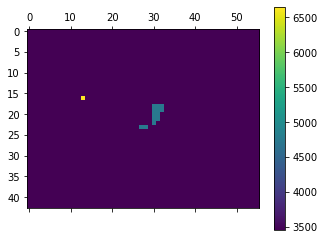

2408 9.853284 151.79816 62.364425739972695


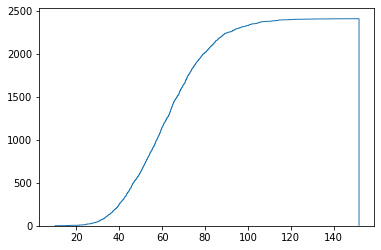

Got spectra (43, 56, 17900)


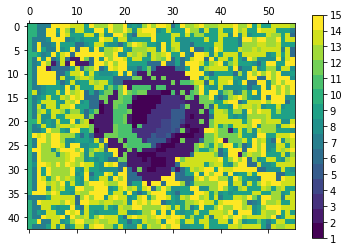

In [57]:
spectra1 = imze.get_region_array(1, makeNullLine=True)
imze.normalize_region_array(spectra1, normalize="vector")
imze.list_highest_peaks(spectra1, counter=True)
print("Got spectra", spectra1.shape)

spec1 = SpectraRegion(spectra1, imze.mzValues)
spec1.calculate_similarity(mode="spectra_log_dist")
spec1.segment(method="WARD", number_of_regions=15)
spec1.plot_segments()

So far the results were only for one IMS sample.

Now the idea is to integrate multiple samples, in order to compare the different samples which were measured on the same slide.

Hence the remaining samples are processed, all in the same fashion. With the inter and intro normalization, the sample are made comparable.

In [67]:
pw = ProteinWeights("protein_weights.tsv")

def process_imzeregion(imze, regionID, basename):
    
    print("Processing regionID", regionID, "for basename", basename)
    
    spectra_orig = imze.get_region_array(regionID, makeNullLine=True)
    spectra_intra = imze.normalize_region_array(spectra_orig, normalize="intra_median")
    spectra = imze.normalize_region_array(spectra_intra, normalize="inter_median")
    
    rspec = SpectraRegion(spectra, imze.mzValues, name=basename + "_" + str(regionID))
    rspec.calculate_similarity(mode="spectra_log_dist")
    rspec.segment(method="WARD", number_of_regions=15)
    rspec.plot_segments()
    
    rspec.filter_clusters(method='remove_singleton')
    rspec.filter_clusters(method='merge_background')
    rspec.filter_clusters(method='remove_islands')
    rspec.filter_clusters(method='remove_islands', minIslandSize=15)
    rspec.plot_segments()
    
    rspec.consensus_spectra()
    rspec.consensus_similarity()
    rspec.plot_consensus_similarity()
    
    mgenes = None
    mgenes_bg = None
    mgenes = rspec.find_all_markers(pw, includeBackground=False, replaceExisting=False, use_methods = ["ttest", "rank"])
    mgenes_bg = rspec.find_all_markers(pw, includeBackground=True, replaceExisting=False, use_methods = ["ttest", "rank"])
    
    return rspec, mgenes, mgenes_bg
    

First set the logging level to warn, to remove too many messages ...

In [68]:
loggers = [logging.getLogger(name) for name in logging.root.manager.loggerDict]
for logger in loggers:
    logger.setLevel(logging.WARN)

Processing regionID 0 for basename slideD


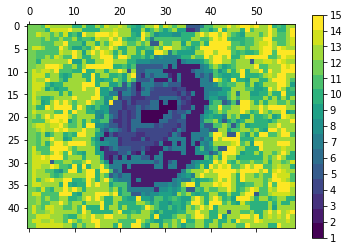

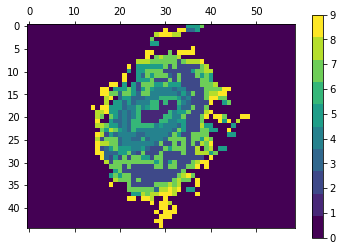

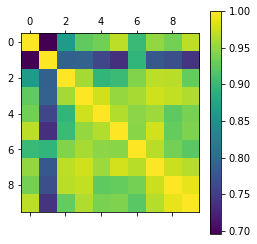

/usr/local/lib/python3.8/dist-packages/anndata/_core/anndata.py:119: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


Processing regionID 1 for basename slideD


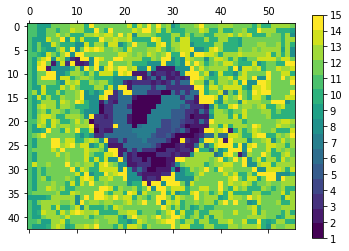

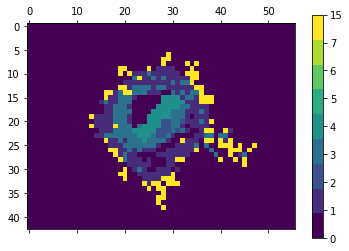

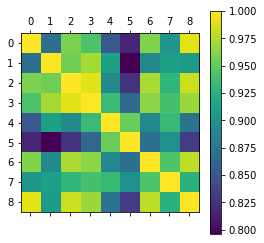

In [69]:
slided_0, slided0_mgenes, slided0_mgenes_bg = process_imzeregion(imze=imze, regionID= 0, basename="slideD")
slided_1, slided1_mgenes, slided1_mgenes_bg = process_imzeregion(imze=imze, regionID= 1, basename="slideD")

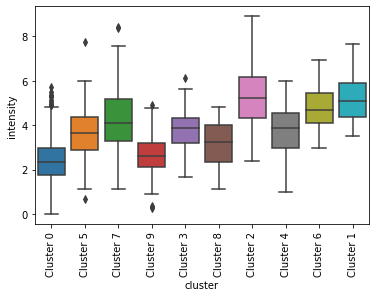

/usr/local/lib/python3.8/dist-packages/IPython/core/pylabtools.py:132: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


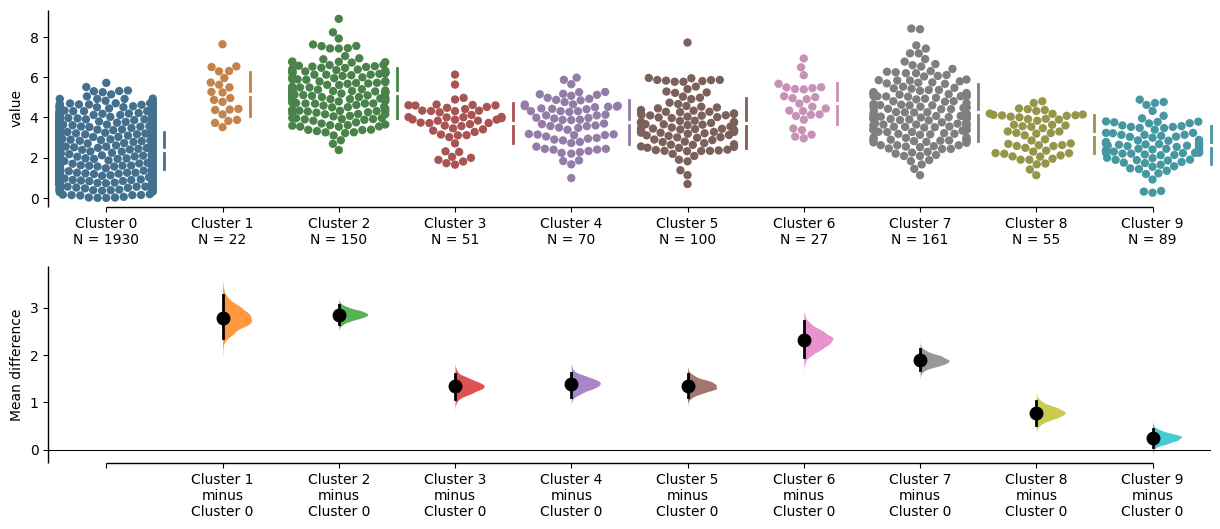

In [70]:
slided_0.mass_dabest(pw.protein2mass.get("Tmsb4x"))

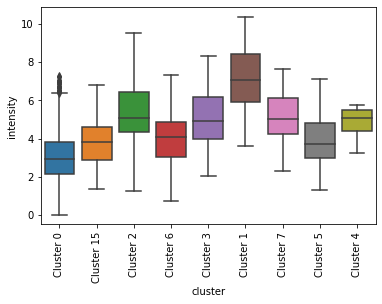

/usr/local/lib/python3.8/dist-packages/IPython/core/pylabtools.py:132: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


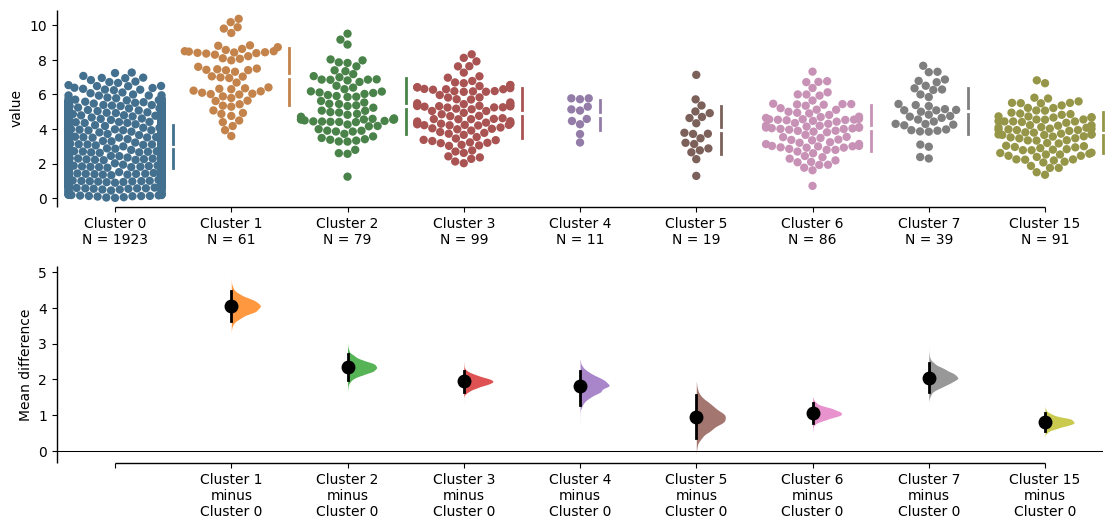

In [71]:
slided_1.mass_dabest(pw.protein2mass.get("Tmsb4x"))

Processing regionID 4 for basename slideD


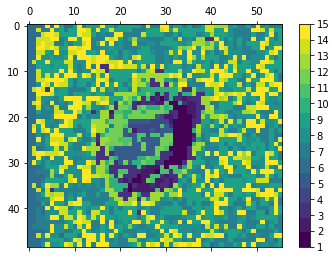

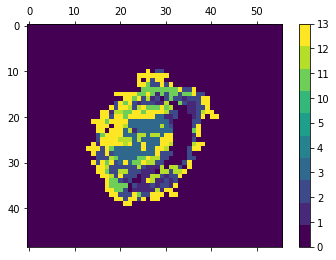

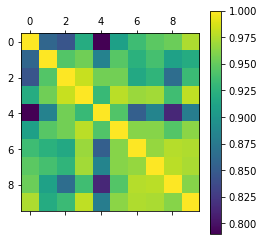

/usr/local/lib/python3.8/dist-packages/anndata/_core/anndata.py:119: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


Processing regionID 5 for basename slideD


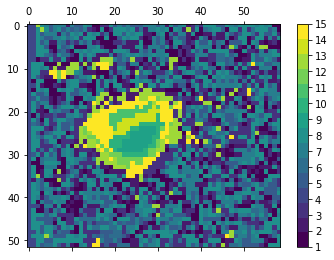

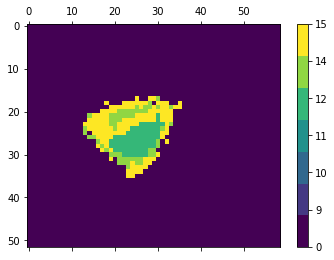

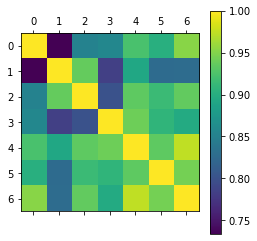

In [72]:
slided_4, slided4_mgenes, slided4_mgenes_bg = process_imzeregion(imze=imze, regionID= 4, basename="slideD")
slided_5, slided5_mgenes, slided5_mgenes_bg = process_imzeregion(imze=imze, regionID= 5, basename="slideD")

In [73]:
loggers = [logging.getLogger(name) for name in logging.root.manager.loggerDict]
for logger in loggers:
    logger.setLevel(logging.INFO)

In [74]:
markerGenes0 = slided0_mgenes["ttest"]
markerGenes0.to_csv("deresults/marker_genes_region_0.tsv", sep="\t", index=False)
markerGenes1 = slided1_mgenes["ttest"]
markerGenes1.to_csv("deresults/marker_genes_region_1.tsv", sep="\t", index=False)
markerGenes4 = slided4_mgenes["ttest"]
markerGenes4.to_csv("deresults/marker_genes_region_4.tsv", sep="\t", index=False)
markerGenes5 = slided5_mgenes["ttest"]
markerGenes5.to_csv("deresults/marker_genes_region_5.tsv", sep="\t", index=False)


In [75]:
! python3 analyseMarkers.py --organs "Connective tissue" "Vasculature" "Heart" "Skeletal Muscle" "Smooth muscle" "Immune system" "Blood" "Epithelium" "Liver" --pvaladj qvalue --markers deresults/marker_genes_region_0.tsv -n 2

Taking value gene from gene
Taking value cluster from clusterID
Taking value logfc from avg_logFC
Taking value pvaladj from qvalue
Taking value expr-mean from mean
Taking value expressing-cell-count from num
Taking value cluster-cell-count from anum
Got 9 clusters.
Starting analysis
Loaded Databases
known genes 38
known (celltype, organ) 50
1	Monocytes;Immune system	7.838902782428564	1	1	1	1	{'IFITM3'}	{'IFITM3'}
1	Gamma delta T cells;Immune system	2.749178648780013	1	1	1	1	{'H2AFX'}	{'H2AFX'}
2	Hepatocytes;Liver	2.6953207796541077	1	5	1	2	{'APOA2'}	{'APOA2'}
2	Megakaryocytes;Immune system	0.2594805636904732	1	1	0	0	set()	{'PF4'}
4	Mast cells;Immune system	0.07967096968723586	1	1	0	0	set()	{'PCP4L1'}
4	Smooth muscle cells;Smooth muscle	0.03983548484361793	1	2	0	0	set()	{'PCP4L1'}
5	Monocytes;Immune system	0.0	1	1	1	1	{'IFITM3'}	{'IFITM3'}
6	Monocytes;Immune system	2.9050225537707983	1	1	1	1	{'IFITM3'}	{'IFITM3'}
6	Gamma delta T cells;Immune system	1.6411382296388108	1	1	1	1	{'H2AFX'}	{

In [76]:
! python3 analyseMarkers.py --organs "Connective tissue" "Vasculature" "Heart" "Skeletal Muscle" "Smooth muscle" "Immune system" "Blood" "Epithelium" "Liver" --pvaladj qvalue --markers deresults/marker_genes_region_1.tsv -n 2

Taking value gene from gene
Taking value cluster from clusterID
Taking value logfc from avg_logFC
Taking value pvaladj from qvalue
Taking value expr-mean from mean
Taking value expressing-cell-count from num
Taking value cluster-cell-count from anum
Got 7 clusters.
Starting analysis
Loaded Databases
known genes 26
known (celltype, organ) 41
1	Hepatocytes;Liver	33.60515668588285	2	2	1	1	{'APOA2'}	{'HAMP', 'APOA2'}
1	Megakaryocytes;Immune system	0.1500766481068576	1	2	0	0	set()	{'PF4'}
4	B cells;Immune system	0.02204693040509172	1	1	0	0	set()	{'CD79A'}
4	B cells naive;Immune system	0.02172077170430471	1	1	0	0	set()	{'CD79A'}
5	Basophils;Immune system	0.0	2	2	0	0	set()	{'IGFBP7', 'IFITM1'}
5	Endothelial cells;Vasculature	0.0	2	3	0	0	set()	{'IGFBP7', 'CD9'}
6	Hepatic stellate cells;Liver	0.0	1	3	0	0	set()	{'RBP1'}
6	Hepatocytes;Liver	0.0	1	2	1	1	{'APOA2'}	{'APOA2'}
7	Adipocytes;Connective tissue	0.8440981382003979	1	2	1	1	{'APOC1'}	{'APOC1'}
7	Cardiomyocytes;Heart	0.0	1	1	0	0	set()	{'HAMP'

In [77]:
! python3 analyseMarkers.py --organs "Connective tissue" "Vasculature" "Heart" "Skeletal Muscle" "Smooth muscle" "Immune system" "Blood" "Epithelium" "Liver" --pvaladj qvalue --markers deresults/marker_genes_region_4.tsv -n 2

Taking value gene from gene
Taking value cluster from clusterID
Taking value logfc from avg_logFC
Taking value pvaladj from qvalue
Taking value expr-mean from mean
Taking value expressing-cell-count from num
Taking value cluster-cell-count from anum
Got 9 clusters.
Starting analysis
Loaded Databases
known genes 33
known (celltype, organ) 47
1	Cardiomyocytes;Heart	0.0	1	1	0	0	set()	{'HAMP'}
1	Hepatic stellate cells;Liver	0.0	1	2	0	0	set()	{'RBP1'}
2	Hepatocytes;Liver	22.469297560027645	1	2	1	1	{'APOA2'}	{'APOA2'}
2	Adipocytes;Connective tissue	2.1091581317721984	1	1	1	1	{'APOC1'}	{'APOC1'}
4	Hepatocytes;Liver	47.88654339638408	2	2	1	1	{'APOA2'}	{'APOA2', 'HAMP'}
4	Platelets;Blood	10.047379955041286	3	3	2	2	{'HIST1H2BK', 'HIST1H2BC'}	{'PF4', 'HIST1H2BK', 'HIST1H2BC'}
5	Monocytes;Immune system	2.6996292017777446	1	1	1	1	{'IFITM3'}	{'IFITM3'}
5	Mast cells;Immune system	0.10634055032646324	1	1	0	0	set()	{'PCP4L1'}
10	Basophils;Immune system	0.0	1	2	0	0	set()	{'IFITM1'}
10	Gamma delta T cell

In [78]:
! python3 analyseMarkers.py --organs "Connective tissue" "Vasculature" "Heart" "Skeletal Muscle" "Smooth muscle" "Immune system" "Blood" "Epithelium" "Liver" --pvaladj qvalue --markers deresults/marker_genes_region_5.tsv -n 2

Taking value gene from gene
Taking value cluster from clusterID
Taking value logfc from avg_logFC
Taking value pvaladj from qvalue
Taking value expr-mean from mean
Taking value expressing-cell-count from num
Taking value cluster-cell-count from anum
Got 6 clusters.
Starting analysis
Loaded Databases
known genes 48
known (celltype, organ) 54
9	Endothelial cells;Vasculature	1.2757057269472925	2	3	1	1	{'S100A13'}	{'GNG11', 'S100A13'}
9	Erythroid-like and erythroid precursor cells;Blood	0.8664981888183133	1	2	1	1	{'SNCA'}	{'SNCA'}
10	Gamma delta T cells;Immune system	0.0	1	3	1	1	{'H2AFX'}	{'H2AFX'}
10	Hepatocytes;Liver	0.0	1	3	1	1	{'APOA2'}	{'APOA2'}
11	Hepatocytes;Liver	34.156975860122586	2	3	1	1	{'APOA2'}	{'APOA2', 'HAMP'}
11	Platelets;Blood	7.854087829486369	4	5	2	2	{'HIST1H2BC', 'HIST1H2BK'}	{'HIST1H2BC', 'HIST1H2BK', 'CA2', 'PF4'}
14	Adipocytes;Connective tissue	2.5971531164801576	2	2	2	2	{'TSPO', 'APOC1'}	{'TSPO', 'APOC1'}
14	Monocytes;Immune system	0.436855513192521	2	2	1	1	{'IFITM3

From these cell type predictions it can be seen that mostly atherosclerosis relates cell types are showing up.

# Creating a CombinedSpectra

In [79]:
slided_0.name = "slided_0"
slided_1.name = "slided_1"
slided_4.name = "slided_4"
slided_5.name = "slided_5"

In [80]:
slided_0.to_pickle("deresults/slideD_region_0.pickle")
slided_1.to_pickle("deresults/slideD_region_1.pickle")

In [81]:
#slided_4.to_pickle("deresults/slideD_region_4.pickle")
#slided_5.to_pickle("deresults/slideD_region_5.pickle")

In [82]:
#slided_0 = SpectraRegion.from_pickle("slideD_region_0.pickle")
#slided_1 = SpectraRegion.from_pickle("slideD_region_1.pickle")
#slided_4 = SpectraRegion.from_pickle("slideD_region_4.pickle")
#slided_5 = SpectraRegion.from_pickle("slideD_region_5pickle")

Of course a SpectraRegion can also be re-processed to yield a more realistic clustering.

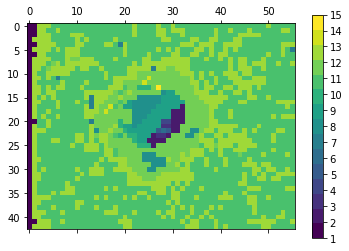

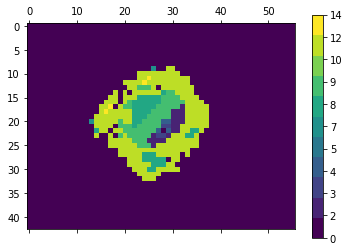

In [255]:
slided_1.segment(method="WPGMA", number_of_regions=15)
slided_1.plot_segments()

slided_1.filter_clusters(method='remove_singleton')
slided_1.filter_clusters(method='merge_background')
slided_1.filter_clusters(method='remove_islands')
slided_1.filter_clusters(method='remove_islands', minIslandSize=15)



slided_1.plot_segments()

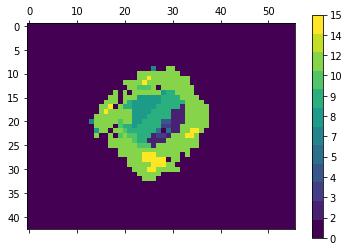

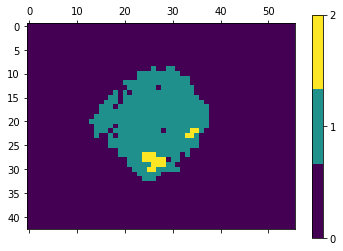

In [258]:
mask = slided_1.segmented == 8
mask[0:22,: ] = False
mask[:,0:22 ] = False
slided_1.segmented[mask] = 15
slided_1.plot_segments()
slided_1.plot_segments(highlight=[15])

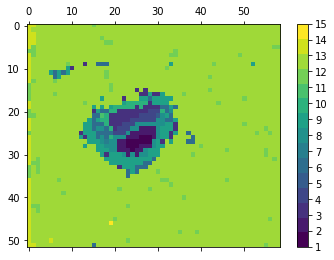

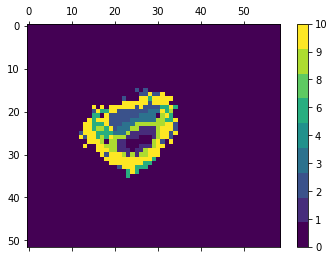

In [199]:
slided_5.segment(method="WPGMA", number_of_regions=15)
slided_5.plot_segments()

slided_5.filter_clusters(method='remove_singleton')
slided_5.filter_clusters(method='merge_background')
slided_5.filter_clusters(method='remove_islands')
slided_5.filter_clusters(method='remove_islands', minIslandSize=15)
slided_5.plot_segments()

Here a CombinedSpectra is creates. This class allows to compare multiple SpectraRegions

In [200]:
combSpec = CombinedSpectra({0: slided_0, 1: slided_1, 4: slided_4, 5: slided_5})

The consensus_smilarity() function calculates the similarity between all the contained spectra's regions using the average cluster/region spectra.

In [201]:
combSpec.consensus_similarity()

In [202]:
combSpec.consensus_similarity_matrix

,"(slided_0, 0)","(slided_0, 1)","(slided_0, 2)","(slided_0, 3)","(slided_0, 4)","(slided_0, 5)","(slided_0, 6)","(slided_0, 7)","(slided_0, 8)","(slided_0, 9)",...,"(slided_4, 13)","(slided_5, 0)","(slided_5, 1)","(slided_5, 2)","(slided_5, 3)","(slided_5, 4)","(slided_5, 6)","(slided_5, 8)","(slided_5, 9)","(slided_5, 10)"
"(slided_0, 0)",1.000000,0.695436,0.863977,0.925801,0.934721,0.969945,0.901204,0.950761,0.936324,0.969104,...,0.958824,0.970917,0.624550,0.729561,0.838543,0.858209,0.919007,0.847734,0.895216,0.902130
"(slided_0, 1)",0.695436,1.000000,0.790356,0.791118,0.760136,0.736796,0.895901,0.779175,0.769445,0.741104,...,0.762101,0.728136,0.535732,0.617759,0.784590,0.707630,0.723666,0.665553,0.767448,0.745297
"(slided_0, 2)",0.863977,0.790356,1.000000,0.958977,0.895306,0.903227,0.942304,0.969613,0.969023,0.928157,...,0.951232,0.900634,0.678278,0.787191,0.980884,0.875409,0.893038,0.828772,0.956871,0.923562
"(slided_0, 3)",0.925801,0.791118,0.958977,1.000000,0.978298,0.951273,0.959670,0.978507,0.971495,0.963538,...,0.982029,0.941387,0.747730,0.852966,0.950482,0.924472,0.963987,0.923998,0.978918,0.975216
"(slided_0, 4)",0.934721,0.760136,0.895306,0.978298,1.000000,0.964818,0.947501,0.955857,0.924540,0.938419,...,0.957402,0.938281,0.725985,0.837770,0.887011,0.934396,0.976203,0.945408,0.946861,0.974097
"(slided_0, 5)",0.969945,0.736796,0.903227,0.951273,0.964818,1.000000,0.946084,0.979431,0.928007,0.941437,...,0.960901,0.965183,0.620312,0.741530,0.872324,0.886102,0.949905,0.874025,0.922725,0.949581
"(slided_0, 6)",0.901204,0.895901,0.942304,0.959670,0.947501,0.946084,1.000000,0.966903,0.936062,0.922082,...,0.947169,0.923760,0.647429,0.765411,0.930847,0.906328,0.925518,0.860693,0.939185,0.940276
"(slided_0, 7)",0.950761,0.779175,0.969613,0.978507,0.955857,0.979431,0.966903,1.000000,0.975614,0.966092,...,0.984255,0.965352,0.666824,0.783531,0.945586,0.905152,0.948472,0.875796,0.963677,0.959658
"(slided_0, 8)",0.936324,0.769445,0.969023,0.971495,0.924540,0.928007,0.936062,0.975614,1.000000,0.988368,...,0.988263,0.956600,0.711470,0.811799,0.962324,0.894506,0.927259,0.866356,0.969729,0.933216
"(slided_0, 9)",0.969104,0.741104,0.928157,0.963538,0.938419,0.941437,0.922082,0.966092,0.988368,1.000000,...,0.989221,0.975244,0.711001,0.808078,0.922693,0.896209,0.939515,0.881589,0.955901,0.929097


Since the inspection of this matrix becomes tidious, particularly if large, it an be plotted :)

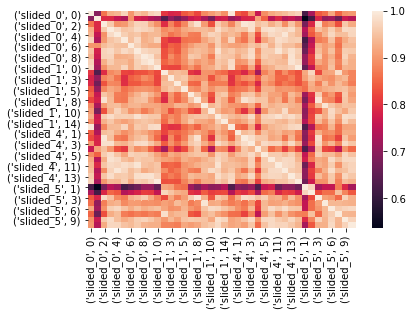

In [203]:
combSpec.plot_consensus_similarity()

It can already be seen that some classes are more similar to each other, than others.

Now the single slide/region clusters are reclustered.

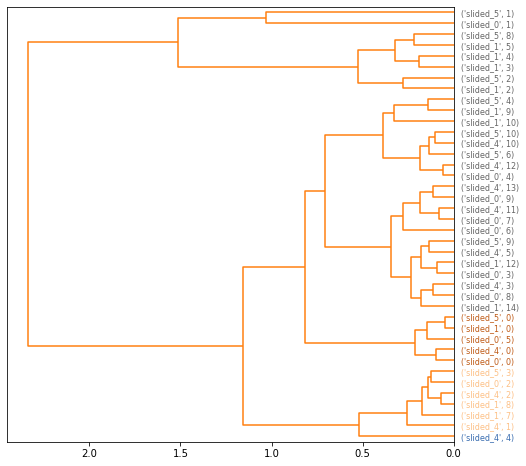

In [204]:
combSpec.cluster_concensus_spectra(number_of_clusters=10)

A detailed print out of the newly assigned cluster for each slide, region.

In [205]:
combSpec.region_cluster2cluster

{('slided_0', 0): 3,
 ('slided_0', 1): 9,
 ('slided_0', 2): 1,
 ('slided_0', 3): 4,
 ('slided_0', 4): 5,
 ('slided_0', 5): 3,
 ('slided_0', 6): 4,
 ('slided_0', 7): 4,
 ('slided_0', 8): 4,
 ('slided_0', 9): 4,
 ('slided_1', 0): 3,
 ('slided_1', 2): 7,
 ('slided_1', 3): 8,
 ('slided_1', 4): 8,
 ('slided_1', 5): 8,
 ('slided_1', 7): 1,
 ('slided_1', 8): 1,
 ('slided_1', 9): 6,
 ('slided_1', 10): 6,
 ('slided_1', 12): 4,
 ('slided_1', 14): 4,
 ('slided_4', 0): 3,
 ('slided_4', 1): 1,
 ('slided_4', 2): 1,
 ('slided_4', 3): 4,
 ('slided_4', 4): 2,
 ('slided_4', 5): 4,
 ('slided_4', 10): 5,
 ('slided_4', 11): 4,
 ('slided_4', 12): 5,
 ('slided_4', 13): 4,
 ('slided_5', 0): 3,
 ('slided_5', 1): 10,
 ('slided_5', 2): 7,
 ('slided_5', 3): 1,
 ('slided_5', 4): 6,
 ('slided_5', 6): 5,
 ('slided_5', 8): 8,
 ('slided_5', 9): 4,
 ('slided_5', 10): 5}

The new assignment can also be plotted:

{0: 3, 1: 9, 2: 1, 3: 4, 4: 5, 5: 3, 6: 4, 7: 4, 8: 4, 9: 4}
{0: 3, 2: 7, 3: 8, 4: 8, 5: 8, 7: 1, 8: 1, 9: 6, 10: 6, 12: 4, 14: 4}
{0: 3, 1: 1, 2: 1, 3: 4, 4: 2, 5: 4, 10: 5, 11: 4, 12: 5, 13: 4}
{0: 3, 1: 10, 2: 7, 3: 1, 4: 6, 6: 5, 8: 8, 9: 4, 10: 5}
{1.0: 1.0, 2.0: 2.0, 3.0: 3.0, 4.0: 4.0, 5.0: 5.0, 6.0: 6.0, 7.0: 7.0, 8.0: 8.0, 9.0: 9.0, 10.0: 10.0}


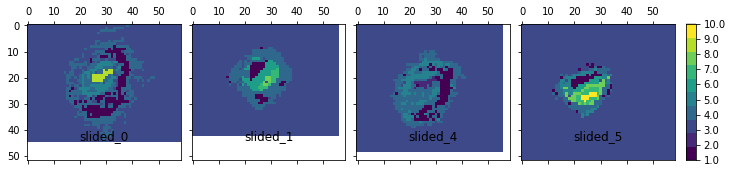

In [206]:
combSpec.plot_common_segments()

And of course, interpreted.

Slide 1 and Slide 5 appear to be similar, and slide 0 and slide 4.



{0: 3, 1: 9, 2: 1, 3: 4, 4: 5, 5: 3, 6: 4, 7: 4, 8: 4, 9: 4}
{0: 3, 2: 7, 3: 8, 4: 8, 5: 8, 7: 1, 8: 1, 9: 6, 10: 6, 12: 4, 14: 4}
{0: 3, 1: 1, 2: 1, 3: 4, 4: 2, 5: 4, 10: 5, 11: 4, 12: 5, 13: 4}
{0: 3, 1: 10, 2: 7, 3: 1, 4: 6, 6: 5, 8: 8, 9: 4, 10: 5}
{1.0: 1.0, 2.0: 2.0}


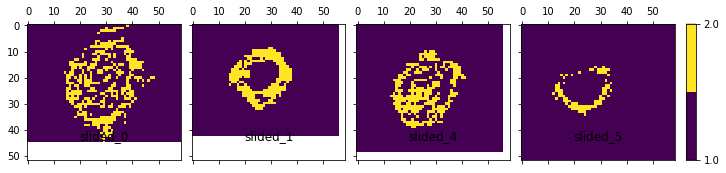

In [207]:
combSpec.plot_common_segments(highlight=(4))

Similar to a normal SpectraRegion, also specific masses can be plotted. Here we can see that mass 14954 is not present in slides 1 and 5!

../src/pySRM/pysrm/comparative.py:296: MatplotlibDeprecationWarning: Since 3.2, mpl_toolkits's own colorbar implementation is deprecated; it will be removed two minor releases later.  Set the 'mpl_toolkits.legacy_colorbar' rcParam to False to use Matplotlib's default colorbar implementation and suppress this deprecation warning.
  ax.cax.colorbar(heatmap)


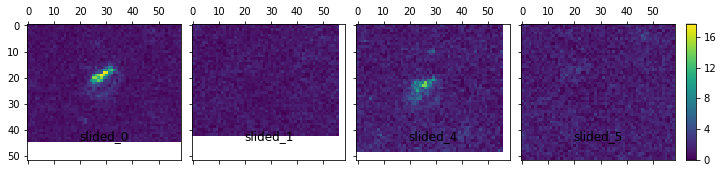

In [208]:
_ = combSpec.mass_heatmap(14954)

Slide 0 cluster 2 and slide 4 cluster 1 seem to be very similar. We now want to see whether some differences can be observed.

For this, we suspect that slides 0 and 4 are disease-samples, and slides 1 and 5 are controls.

We now compare the outer regions of both samples:

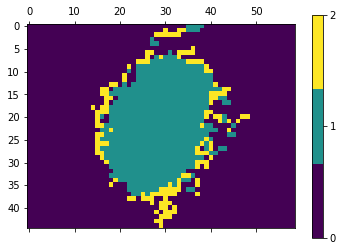

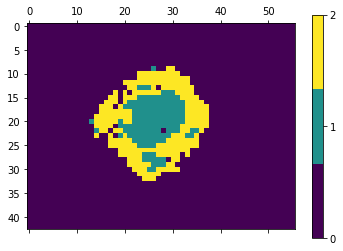

In [214]:
combSpec.regions["slided_0"].plot_segments(highlight=[8,9])
combSpec.regions["slided_1"].plot_segments(highlight=[12,14])

In [215]:
resdf, expr, pdata = combSpec.find_markers("slided_0", [8,9], "slided_1", [12,14], pw, scaled=True)

Running slided_0 [8, 9] against slided_1 [12, 14]


/usr/local/lib/python3.8/dist-packages/anndata/_core/anndata.py:119: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


In [216]:
combSpec.list_de_results()

[('ttest', ('slided_0', (8, 9), 'slided_1', (12, 14))),
 ('rank', ('slided_0', (8, 9), 'slided_1', (12, 14)))]

In [217]:
mydf = resdf["ttest"][('slided_0', (8,9,), 'slided_1', (12,14,))]

In order to plot a volcano plot for the differential masses/proteins, the result DF is subset to only have masses displayed that have a mean intensity of at least 2.

In [218]:
from adjustText import adjust_text

In [219]:
mydf

,clusterID,gene_ident,gene_mass,gene,protein_mass,avg_logFC,qvalue,num,anum,mean,median,num_bg,anum_bg,mean_bg,median_bg
0,slided_0,mass_5679_336767354966,5679.336767,Tmsb4x,5679.4,0.537176,1.299564e-21,144,144,2.832299,2.699231,226,226,4.180667,4.104605
1,slided_0,mass_5680_84590056829,5680.845901,Tmsb4x,5679.4,0.512323,4.701023e-16,144,144,2.239389,2.234354,226,226,3.279819,3.132707
2,slided_0,mass_6539_542698949788,6539.542699,Uqcr11,6538.6,-0.606807,7.406005e-13,144,144,1.926868,1.841511,226,222,1.444315,1.464168
3,slided_0,mass_6541_0518321631125,6541.051832,Uqcr11,6538.6,-0.789786,4.237437e-26,144,144,2.719055,2.723351,226,225,1.946508,2.022359
4,slided_0,mass_6645_182023882486,6645.182024,Fau,6647.8,-0.858644,9.897530e-56,144,144,22.709674,21.902470,226,226,17.588582,17.147384
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189,slided_0,mass_21176_625734981695,21176.625735,Tmco1,21175.0,0.586579,9.697879e-49,144,144,2.294745,2.301520,226,226,2.936173,2.948086
190,slided_0,mass_21178_134868195022,21178.134868,Tmem205,21180.0,0.614722,6.618360e-52,144,144,2.144340,2.151959,226,226,2.764067,2.741473
191,slided_0,mass_21179_644001408346,21179.644001,Tmem205,21180.0,0.637667,1.627737e-53,144,144,1.983365,2.003148,226,226,2.564116,2.512008
192,slided_0,mass_21181_15313462167,21181.153135,Tmem205,21180.0,0.649626,1.071047e-53,144,144,1.833432,1.830741,226,226,2.366782,2.327563


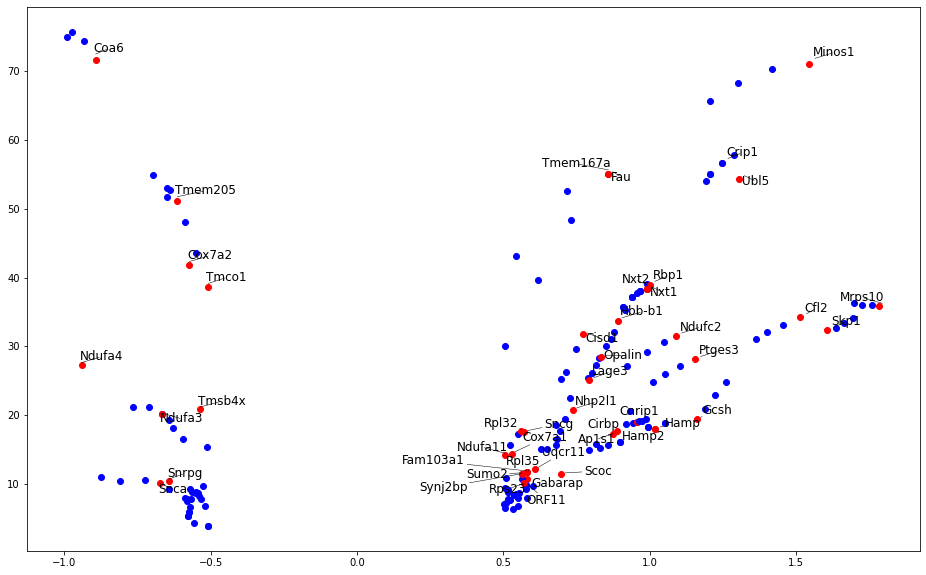

In [220]:
plt.figure(figsize=(16,10))
xydots = [(x,y) for x,y in zip(list(-mydf["avg_logFC"]), list(-np.log10(mydf["qvalue"])))]
dotgene = list(mydf["gene"])
texts = []
seenProts = set()

for i in range(len(xydots)):
    x = xydots[i][0]
    y = xydots[i][1]
    
    if not dotgene[i] in seenProts and abs(y) >= 10 and abs(x) >= 0.5:
        texts.append(plt.text(x * (1 + 0.01), y * (1 + 0.01) , dotgene[i], fontsize=12))
        plt.plot(x, y, 'ro')
        seenProts.add(dotgene[i])
    else:
        plt.plot(x, y, 'bo')

adjust_text(texts, force_points=0.2, force_text=0.2, expand_points=(1, 1), expand_text=(1, 1), arrowprops=dict(arrowstyle="-", color='black', lw=0.5))
plt.show()

Both regions are very similar, however, some differences can be seen.

First it is very interesting to see a difference in Tmsb4x between the (suspected) control and disease aortas.
Such a difference between the 

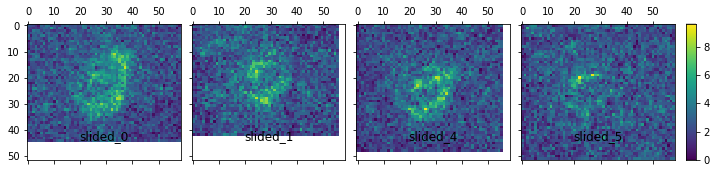

In [221]:
_ = combSpec.mass_heatmap(pw.protein2mass.get("Tmsb4x"), scaled=True)

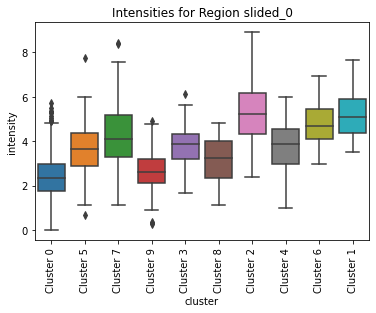

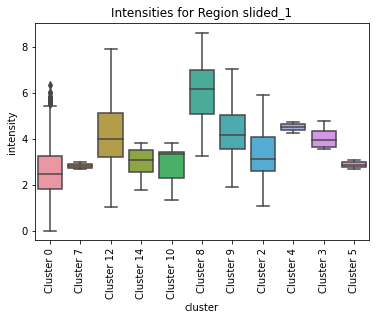

In [222]:
combSpec.mass_intensity(pw.protein2mass.get("Tmsb4x"), regions=["slided_0", "slided_1"], scaled=True)

In [261]:
combSpec.get_internormed_regions()

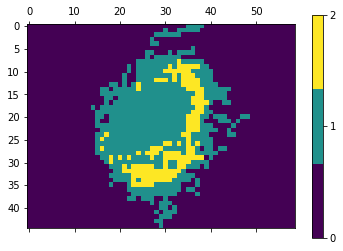

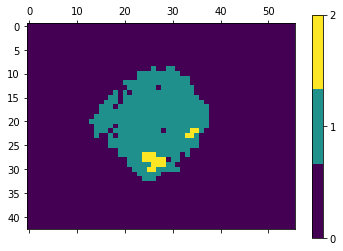

In [259]:
combSpec.regions["slided_0"].plot_segments(highlight=[2])
combSpec.regions["slided_1"].plot_segments(highlight=[15])

In [265]:
resdf_calc, expr, pdata = combSpec.find_markers("slided_0", [x for x in np.unique(slided_0.segmented) if x > 0], "slided_1", [x for x in np.unique(slided_1.segmented) if x > 0], pw, scaled=True)

Running slided_0 [1, 2, 3, 4, 5, 6, 7, 8, 9] against slided_1 [2, 3, 4, 5, 7, 8, 9, 10, 12, 14, 15]


/usr/local/lib/python3.8/dist-packages/anndata/_core/anndata.py:119: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


In [266]:
combSpec.list_de_results()

[('ttest', ('slided_0', (8, 9), 'slided_1', (12, 14))),
 ('ttest', ('slided_0', (2,), 'slided_1', (15,))),
 ('ttest',
  ('slided_0',
   (1, 2, 3, 4, 5, 6, 7, 8, 9),
   'slided_1',
   (2, 3, 4, 5, 7, 8, 9, 10, 12, 14, 15))),
 ('rank', ('slided_0', (8, 9), 'slided_1', (12, 14))),
 ('rank', ('slided_0', (2,), 'slided_1', (15,))),
 ('rank',
  ('slided_0',
   (1, 2, 3, 4, 5, 6, 7, 8, 9),
   'slided_1',
   (2, 3, 4, 5, 7, 8, 9, 10, 12, 14, 15)))]

In [267]:
mydf_calc = resdf_calc["ttest"][('slided_0', (1, 2, 3, 4, 5, 6, 7, 8, 9), 'slided_1', (2, 3, 4, 5, 7, 8, 9, 10, 12, 14, 15))]

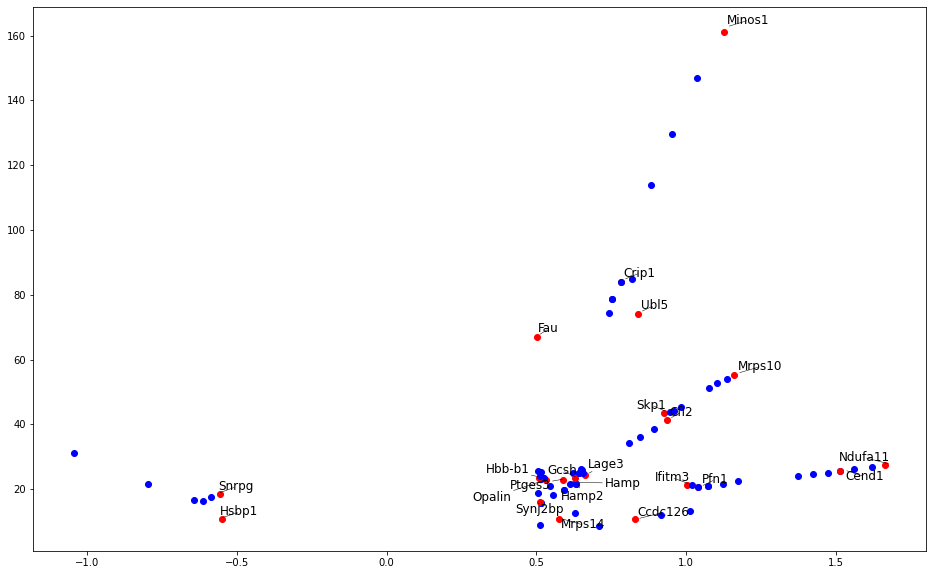

In [268]:
plt.figure(figsize=(16,10))
xydots = [(x,y) for x,y in zip(list(-mydf_calc["avg_logFC"]), list(-np.log10(mydf_calc["qvalue"])))]
dotgene = list(mydf_calc["gene"])
texts = []
seenProts = set()

for i in range(len(xydots)):
    x = xydots[i][0]
    y = xydots[i][1]
    
    if not dotgene[i] in seenProts and abs(y) >= 10 and abs(x) >= 0.5:
        texts.append(plt.text(x * (1 + 0.01), y * (1 + 0.01) , dotgene[i], fontsize=12))
        plt.plot(x, y, 'ro')
        seenProts.add(dotgene[i])
    else:
        plt.plot(x, y, 'bo')

adjust_text(texts, force_points=0.2, force_text=0.2, expand_points=(1, 1), expand_text=(1, 1), arrowprops=dict(arrowstyle="-", color='black', lw=0.5))
plt.show()

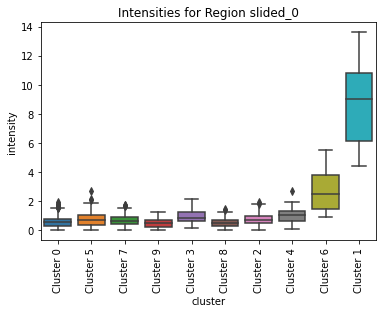

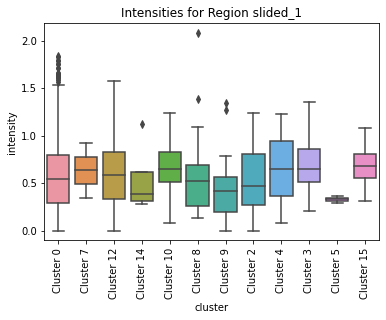

In [270]:
combSpec.mass_intensity(pw.protein2mass.get("Ccdc126"), regions=["slided_0", "slided_1"], scaled=True)

../src/pySRM/pysrm/comparative.py:300: MatplotlibDeprecationWarning: Since 3.2, mpl_toolkits's own colorbar implementation is deprecated; it will be removed two minor releases later.  Set the 'mpl_toolkits.legacy_colorbar' rcParam to False to use Matplotlib's default colorbar implementation and suppress this deprecation warning.
  plt.close()


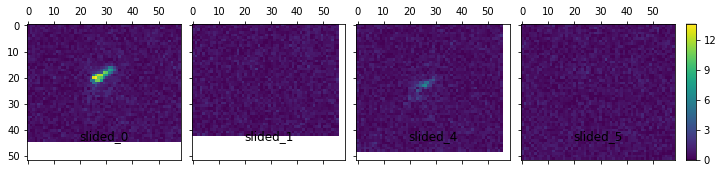

In [271]:
_ = combSpec.mass_heatmap(pw.protein2mass.get("Ccdc126"), scaled=True)

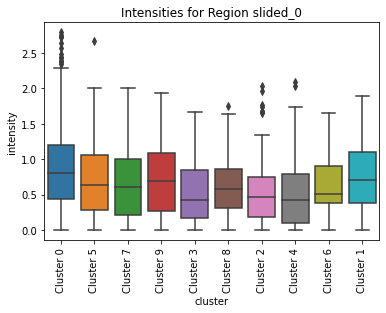

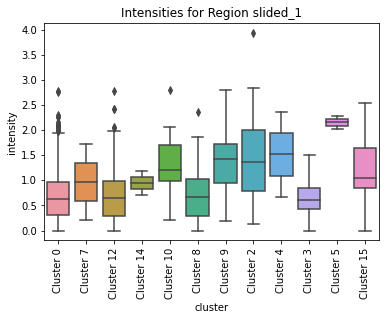

In [279]:
combSpec.mass_intensity(pw.protein2mass.get("Hsbp1"), regions=["slided_0", "slided_1"], scaled=True)

../src/pySRM/pysrm/comparative.py:300: MatplotlibDeprecationWarning: Since 3.2, mpl_toolkits's own colorbar implementation is deprecated; it will be removed two minor releases later.  Set the 'mpl_toolkits.legacy_colorbar' rcParam to False to use Matplotlib's default colorbar implementation and suppress this deprecation warning.
  ax.cax.colorbar(heatmap)


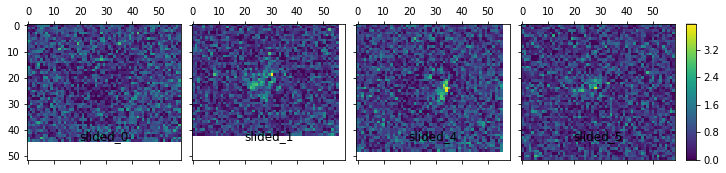

In [280]:
_ = combSpec.mass_heatmap(pw.protein2mass.get("Hsbp1"), scaled=True)